In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Checking whether if there is any missing value.

In [36]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 查看 weather 數量

In [37]:
train_data.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

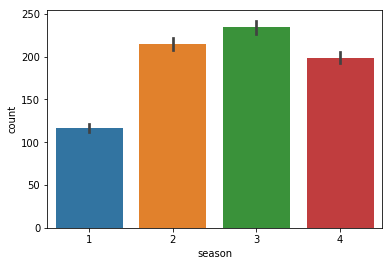

In [38]:
sns.barplot(x='season', y='count', data=train_data)

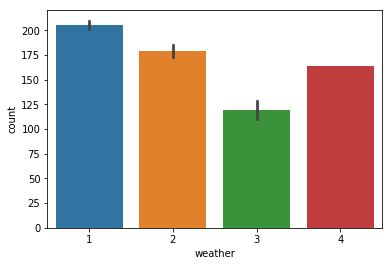

In [39]:
sns.barplot(x='weather', y='count', data=train_data)

## 「 holiday 」中租車的平均數量

In [40]:
train_data[['count', 'holiday']].groupby(['holiday'], as_index = True).mean().sort_values(by = 'count')

,count
holiday,
1,185.877814
0,191.741655


## 「 datetime 」整理

In [74]:
train_data["hour"] = [t.hour for t in pd.DatetimeIndex(train_data.datetime)]
train_data["day"] = [t.dayofweek for t in pd.DatetimeIndex(train_data.datetime)]
train_data["month"] = [t.month for t in pd.DatetimeIndex(train_data.datetime)]
train_data['year'] = [t.year for t in pd.DatetimeIndex(train_data.datetime)]
train_data['year'] = train_data['year'].map({2011:0, 2012:1})
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


## 切割Ｘ, y

In [75]:
X, y = train_data.iloc[:, :], train_data['count']

## 「 casual 」＋「 registered 」＝「 count 」

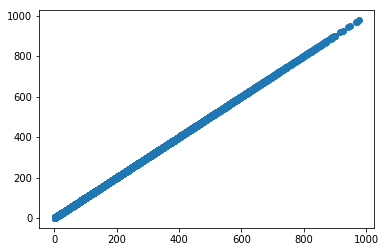

In [76]:
plt.scatter(x = train_data['casual'] + train_data['registered'], y = train_data['count'])
plt.show()

## 刪除不用的參數

In [77]:
X = X.drop(['datetime', 'registered', 'casual', 'count'], axis=1)

In [79]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,0,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0,2,5,1,0
3,1,0,0,1,9.84,14.395,75,0.0,3,5,1,0
4,1,0,0,1,9.84,14.395,75,0.0,4,5,1,0


## 轉dummy variable

In [80]:
categorical_vars = ['season', 'weather']
for var in categorical_vars:
    X = pd.concat([X, pd.get_dummies(X[var], prefix=var)], axis=1)
    X = X.drop(var, axis=1)
X.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,day,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,0,5,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,1,5,1,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,2,5,1,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,3,5,1,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,4,5,1,0,1,0,0,0,1,0,0,0


## 切割train、validation

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=.3, random_state=0)

## 建構模型

In [82]:
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
X_train_std = scl.fit_transform(X_train)
X_validation_std = scl.transform(X_validation)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## LinearRegression

In [83]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(X = X_train_std, y = y_train)

y_train_pred = lr1.predict(X = X_train_std)
y_test_pred = lr1.predict(X = X_validation_std)

In [90]:
print('R^2 train: %.3f' % lr1.score(X_train_std, y_train))
print('R^2 test: %.3f' % lr1.score(X_validation_std, y_validation))

R^2 train: 0.398
R^2 test: 0.395
